# BUSINESS PROBLEM

#### The British canoeing federartion has approached our data science organisation because we specialise in building models that predict weather variables based on other variables and they have the upcoming senoir level world championships coming up in Szeged, Hungray in 2020.
Our task given to us by the federation is to gather data on the weather for this region for a considerable amount of years (whatever amount we feel serves our purpose), based on a certain amount of variables, bulid a model that best predicts Apparent Temperature.
High heat and humidity lead to two problems in the exercising body: 1) increased core body temperature and 2) dehydration.  Increased body temperature (hyperthermia) leads to decreased muscle endurance, which means the muscle’s ability to contract repeatedly or in a sustained manner over long periods of time. The fedeartion would like to train thier athlete's in these sort of conditions leading up to the championships. It is up to us to tell them ecatly what their athletes will feel on the very day they are competeting based on weather variables and factors

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
data = pd.read_csv('cleaned_data')

In [74]:
data.head()

,Date,Summary,Precip_Type,Temperature,Apparent_temperature,Humidity,Wind_speed,Wind_Bearing,Visibility,Pressure,Daily_Summary,Precipitation_cat
0,2006-04-01 00:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.,1
1,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.,1
2,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.,1
3,2006-04-01 03:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.,1
4,2006-04-01 04:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.,1


Text(0.5, 1.0, 'Histogram plot for the Apparent Temperature')

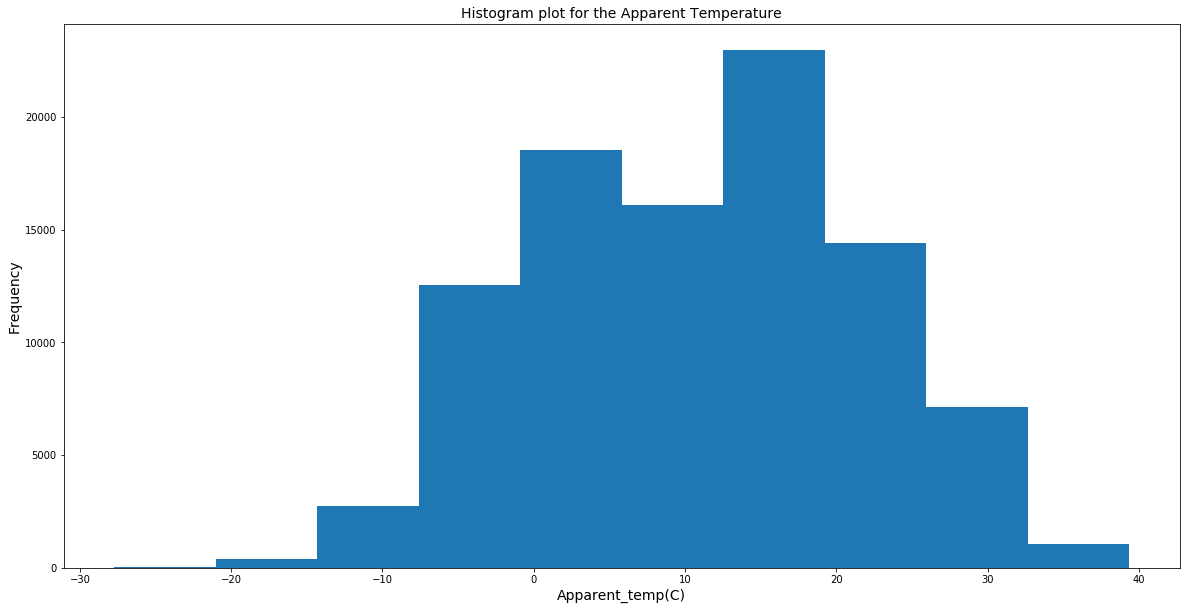

In [75]:
fig = plt.figure(figsize =(20,10))
plt.ylabel('Frequency', fontsize =14)
plt.xlabel('Apparent_temp(C)', fontsize =14)
plt.hist(data['Apparent_temperature'], );
plt.title('Histogram plot for the Apparent Temperature', fontsize = 14)

#### The plot above shows the mean of the distribution to be around 10 degree celcius and calling the describe method below- the value is exactly 10.86 degree celcius

In [76]:
data.describe()

,Temperature,Apparent_temperature,Humidity,Wind_speed,Wind_Bearing,Visibility,Pressure,Precipitation_cat
count,95912.000000,95912.000000,95912.000000,95912.000000,95912.000000,95912.000000,95912.000000,95912.000000
mean,11.937975,10.859194,0.734844,10.806764,187.506986,10.362306,1003.146959,0.888314
std,9.569620,10.716711,0.195717,6.920504,107.378309,4.174204,117.291484,0.314981
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.594444,2.272222,0.600000,5.812100,116.000000,8.355900,1011.890000,1.000000
50%,12.022222,12.022222,0.780000,9.933700,180.000000,10.046400,1016.420000,1.000000
75%,18.844444,18.844444,0.890000,14.135800,290.000000,14.812000,1021.050000,1.000000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000,1.000000


Text(0.5, 1.0, 'KDE plot for the Apparent Temperature(target variable)')

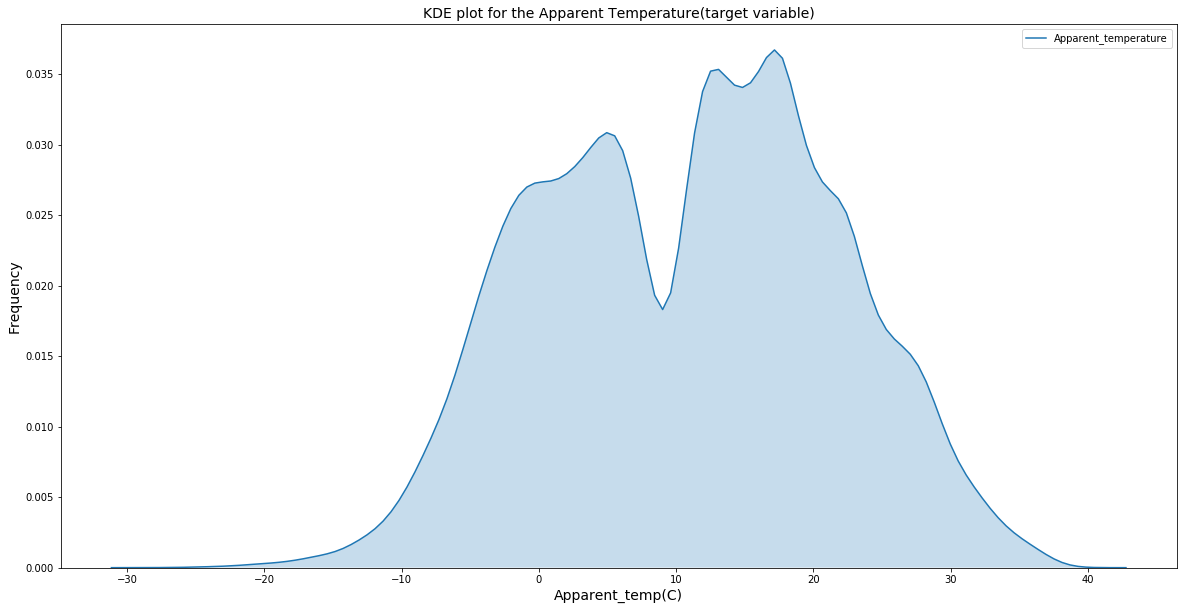

In [77]:
fig = plt.figure(figsize =(20,10))
plt.ylabel('Frequency', fontsize =14)
plt.xlabel('Apparent_temp(C)', fontsize =14)
sns.kdeplot(data['Apparent_temperature'],shade = True );
plt.title('KDE plot for the Apparent Temperature(target variable)', fontsize = 14)

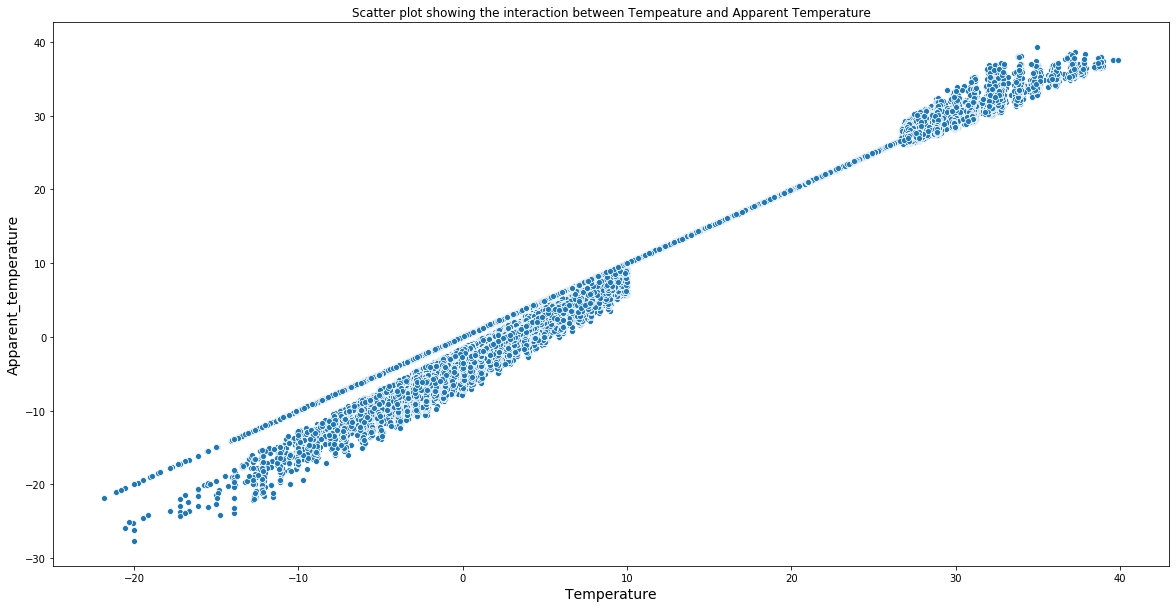

In [78]:
plt.figure(figsize = (20,10))
plt.ylabel('Apparent Temperature', fontsize =14)
plt.xlabel('Temperature', fontsize =14)
plt.title('Scatter plot showing the interaction between Tempeature and Apparent Temperature')
sns.scatterplot(x = 'Temperature', y = 'Apparent_temperature', data = data );

#### The plot above shows there is a strong linear relationship between the independent variable temperature and the dependent variable Apparent Temperature which is the target variable for the model

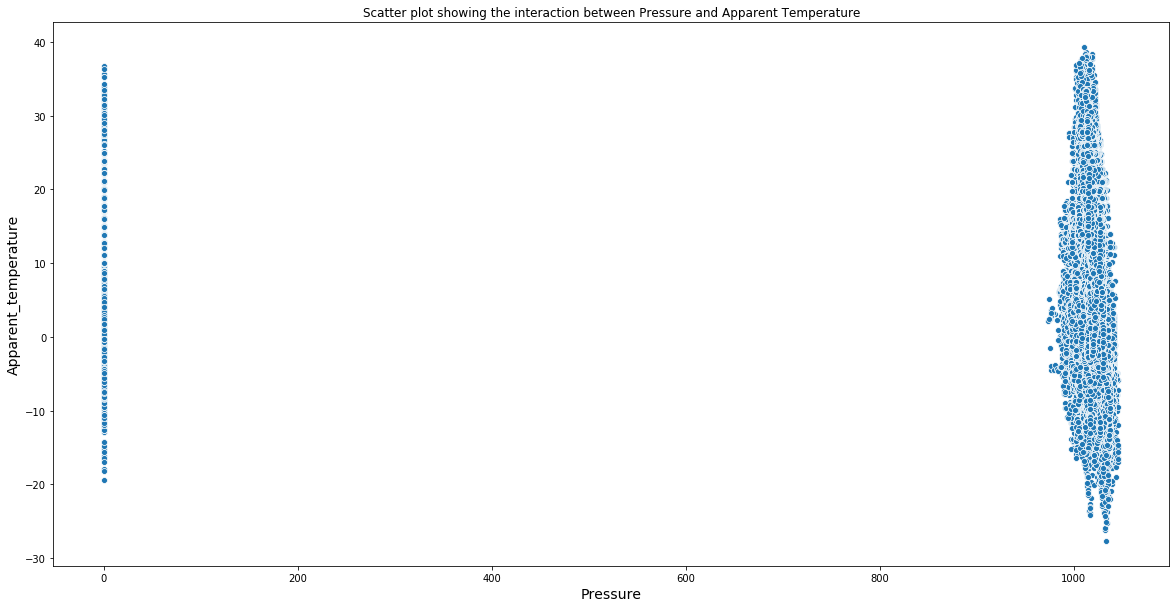

In [79]:
plt.figure(figsize = (20,10))
plt.ylabel('Apparent Temperature', fontsize =14)
plt.xlabel('Pressure', fontsize =14)
plt.title('Scatter plot showing the interaction between Pressure and Apparent Temperature')
sns.scatterplot(x = 'Pressure', y = 'Apparent_temperature', data = data );

#### It is clear to see that there is no linear relationship between the independent variable pressure and the dependent variable Apparent Temperature

plt.figure(figsize = (20,10))
plt.ylabel('Apparent Temperature', fontsize =14)
plt.xlabel('Humidity', fontsize =14)
plt.title('Scatter plot showing the interaction between Pressure and Apparent Temperature')
sns.scatterplot(x = 'Humidity', y = 'Apparent_temperature', data = data );

#### There is also no linear relationship between the variables Humidity and Apparent Temperature

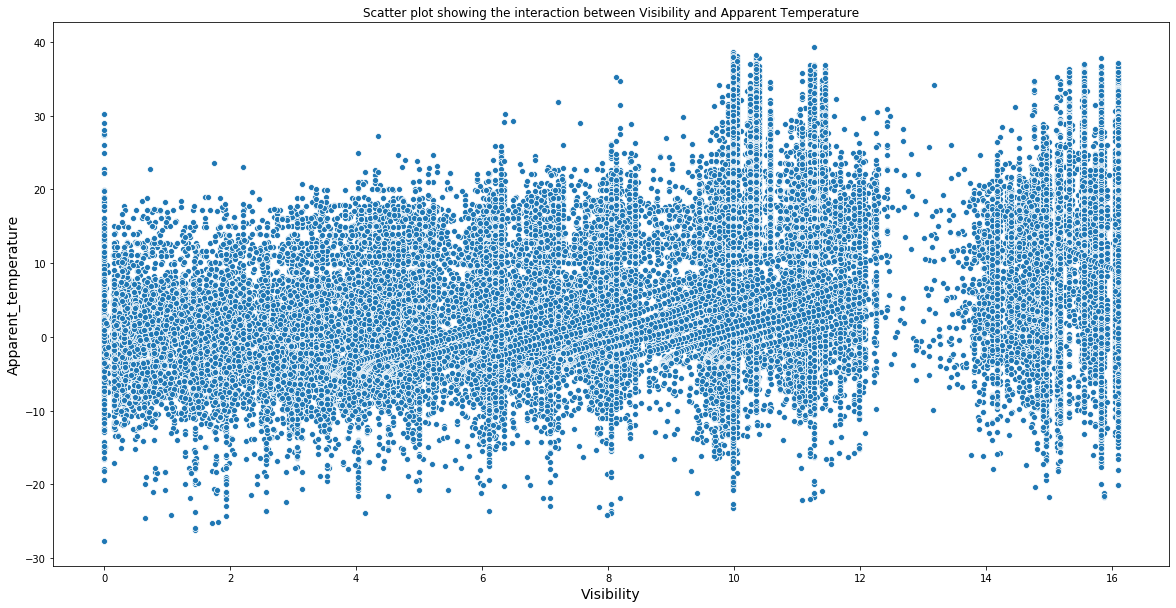

In [80]:
plt.figure(figsize = (20,10))
plt.ylabel('Apparent Temperature', fontsize =14)
plt.xlabel('Visibility', fontsize =14)
plt.title('Scatter plot showing the interaction between Visibility and Apparent Temperature')
sns.scatterplot(x = 'Visibility', y = 'Apparent_temperature', data = data );

#### There is no linear realtionship between the independent variable Visibility and the dependent variable Apparent Temperature

#### Next plots below visulaises the distribiution of several plots in the data table(figuring out whether the distributions are normal)

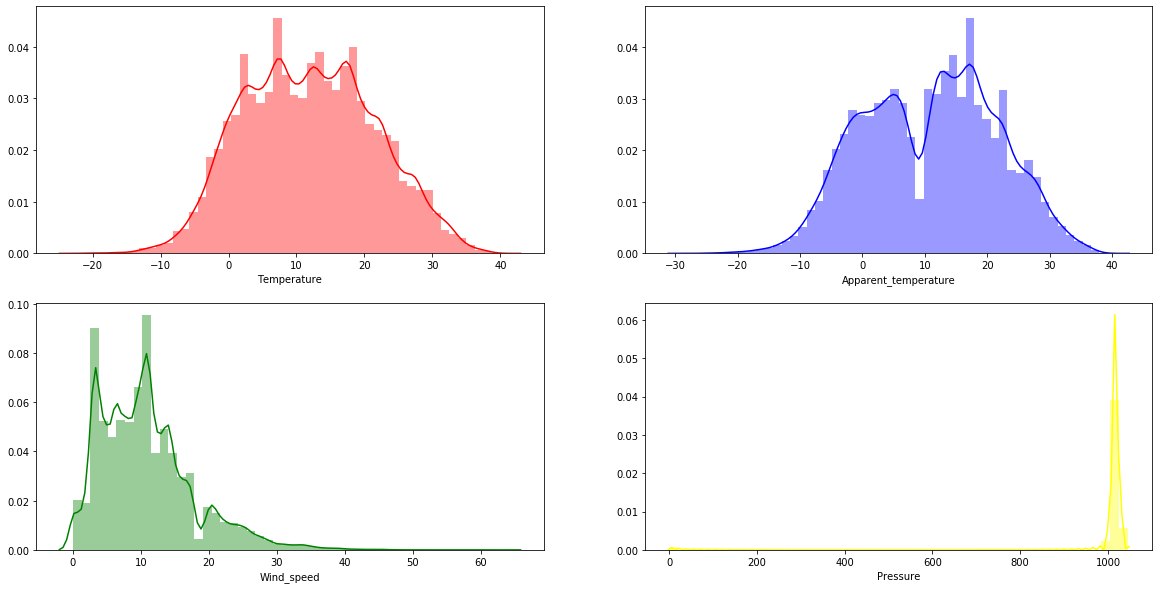

In [81]:
fig = plt.figure(figsize = (20,10))

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

sns.distplot(data['Temperature'], color = 'red', ax = ax1)
sns.distplot(data['Apparent_temperature'], color = 'blue', ax = ax2)
sns.distplot(data['Wind_speed'], color = 'green', ax = ax3)
sns.distplot(data['Pressure'], color = 'yellow', ax = ax4);

#### None of the plots are uniformly distributed especially the pressure variable distribution plot

### PLOTTING THE CATEGORICAL VARIABLES FOR THE PRECIPITATION CATEGORY(SNOW AND RAIN)

<Figure size 2160x720 with 0 Axes>

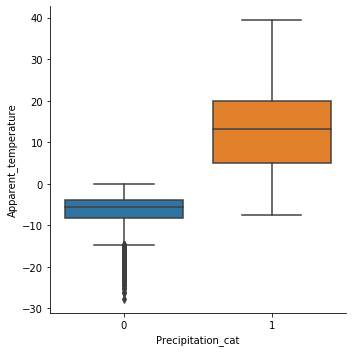

In [82]:
fig = plt.figure(figsize = (30,10))
sns.catplot(x="Precipitation_cat", y="Apparent_temperature", kind="box", data=data);

It is clear to see that the median of the apparent temeprature when it is raining is about 12 degree celcius and the median of the temeprature when it's snowing is about -5 degree celcius

### The next step is to make some analysis on how the Apparent temperature varies over the years and months between 2006 - 2016

In [83]:
data.head()

,Date,Summary,Precip_Type,Temperature,Apparent_temperature,Humidity,Wind_speed,Wind_Bearing,Visibility,Pressure,Daily_Summary,Precipitation_cat
0,2006-04-01 00:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.,1
1,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.,1
2,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.,1
3,2006-04-01 03:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.,1
4,2006-04-01 04:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.,1


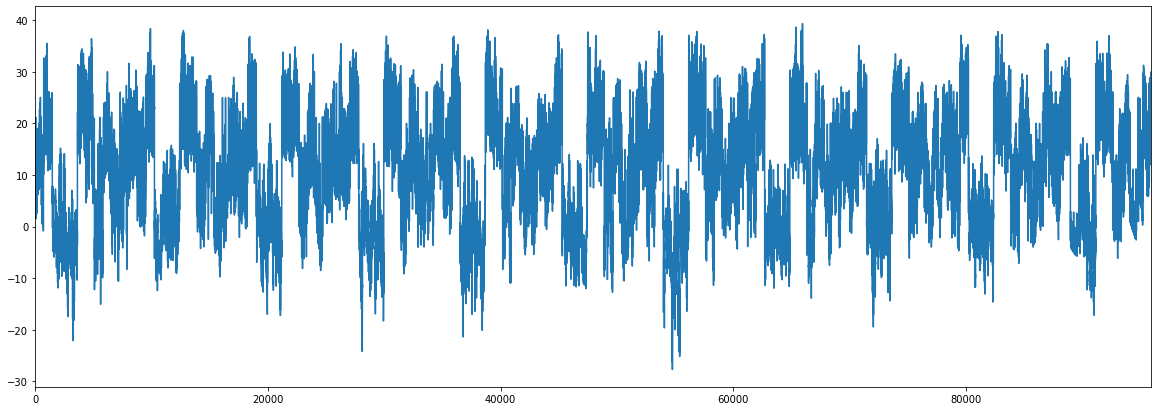

In [84]:
data['Apparent_temperature'].plot(figsize = (20,7));

#### The Apparent temperature  timeseries plot shows seasonality and tredn in the data...

## Above is the plot for the time series for Apparent Temperature the past ten years between 2006-2016 in SZEGED

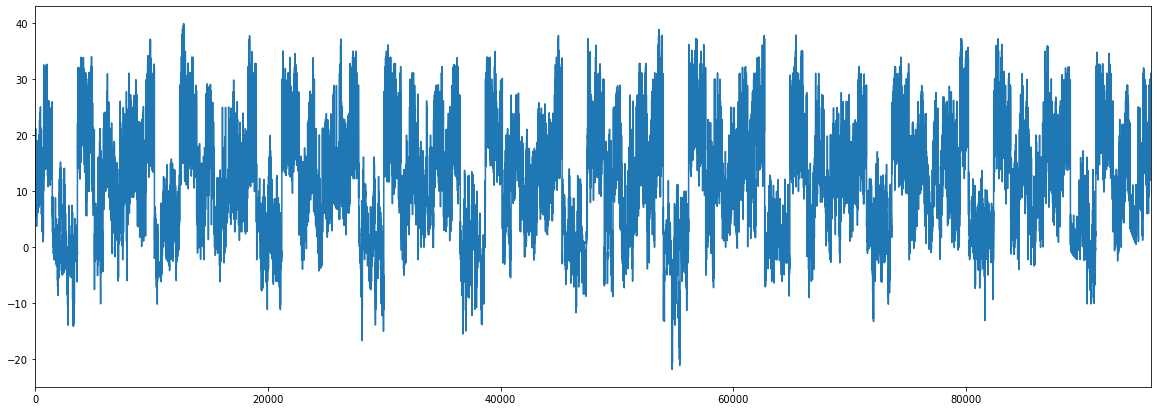

In [85]:
data['Temperature'].plot(figsize = (20,7));

#### Thid time series plot also shows seasonality and trend in the data

## Above is the plot for the time series for Temperature the past ten years between 2006-2016 in SZEGED